In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('Churn-Modelling.csv')

In [3]:
data.head()
data.shape

(10000, 15)

In [4]:
uniqueID = np.unique(data['CustomerId'])
uniqueID.shape

(10000,)

In [5]:
dataWithIndex = data.set_index(data['CustomerId'])

In [6]:
#show data where gender is only male
maleMask = dataWithIndex['Gender'] == "Male"
maleMask
males = dataWithIndex[maleMask]
males.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Unnamed: 14
CustomerId,,,,,,,,,,,,,,,
15574012,6,15574012,Chu,645,Spain,Male,44,8,114K,2,1,0,149756.71,1,NaN
15592531,7,15592531,Bartlett,822,France,Male,50,7,0K,2,1,1,10062.80,0,NaN
15792365,9,15792365,He,501,France,Male,44,4,142K,2,0,1,74940.50,0,NaN
15592389,10,15592389,H?,684,France,Male,27,2,135K,1,1,1,71725.73,0,NaN
15767821,11,15767821,Bearce,528,France,Male,31,6,102K,2,0,0,80181.12,0,NaN


In [7]:
# count male and female in each country add a count column
gender = ['Male', 'Female']
geography = ['France', 'Germany', 'Spain']

grouped = dataWithIndex.groupby(['Geography', 'Gender']).size().reset_index(name='count')

In [8]:
grouped


,Geography,Gender,count
0,France,Female,2261
1,France,Male,2753
2,Germany,Female,1193
3,Germany,Male,1316
4,Spain,Female,1089
5,Spain,Male,1388


<BarContainer object of 6 artists>

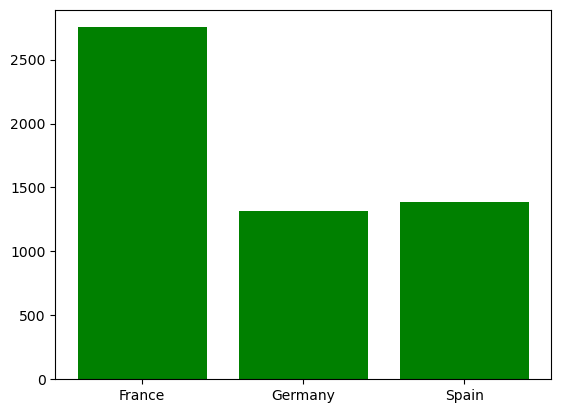

In [9]:
#plot the grouped data in a bar chart
import matplotlib.pyplot as plt
plt.bar(grouped['Geography'], grouped['count'], color='green')


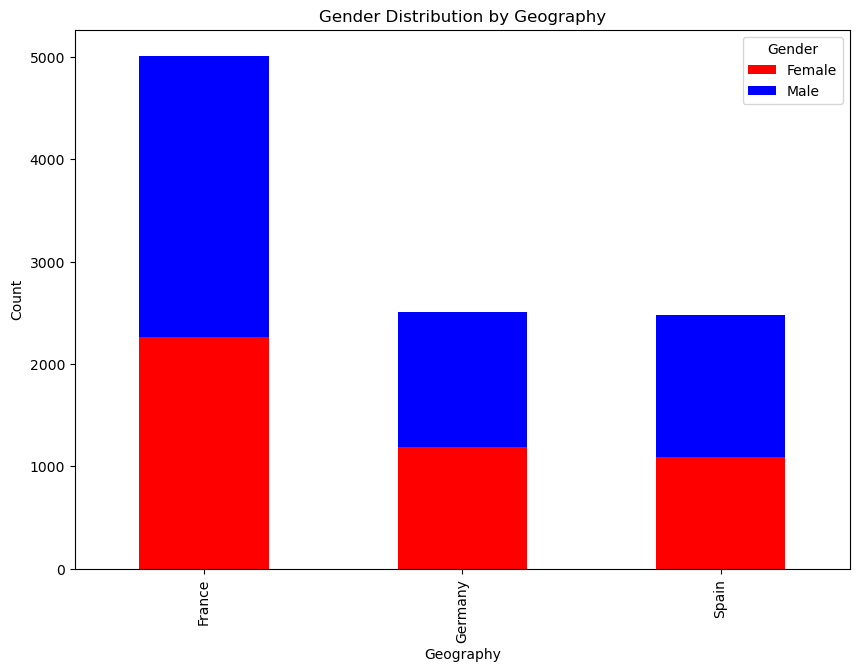

In [10]:
piviot_df = grouped.pivot(index='Geography', columns='Gender', values='count')
piviot_df.plot(kind='bar', stacked=True, figsize=(10, 7), color=['red', 'blue'])


plt.title('Gender Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Gender')


In [11]:
dataWithIndex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Unnamed: 14      0 non-null      float64
dtypes: float64(2), int64(9), object(4)
memory usage: 1.2+ MB
